In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from functions import *
from sklearn.metrics import accuracy_score, confusion_matrix, \
    ConfusionMatrixDisplay, precision_score, recall_score

sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv("~/made_mlops/data/raw/heart_cleveland_upload.csv")
DROP_COLS = ['cp']
TEST_RATIO = 0.2  
TARGET_NAME = 'condition'

df_train, df_test =  get_train_test(data, TEST_RATIO)
print(len(df_train))
default_columns = get_columns(data, DROP_COLS)  
x_train, y_train, scaler, useful_columns = \
    get_transform_options(df_train, default_columns, TARGET_NAME)
x_test, y_test = transform(df_test, default_columns, scaler, useful_columns, TARGET_NAME)

237


In [3]:
len(x_train)

237

In [4]:
model = LogisticRegression(max_iter=1000, tol = 1e-6)
model.fit(x_train, y_train)
for column, coef in zip(useful_columns, model.coef_.ravel()):
    print(column, ':', coef)

sex : 0.7283069603815462
trestbps : 0.6580799341355463
chol : 0.5263400877859223
restecg : 0.6338890893952371
exang : 1.2754647514732558
oldpeak : 0.7803128906836031
slope : 0.858532766095627
ca : 2.5943757166418826
thal : 1.6389638097236274


In [5]:
training_data_predictions = model.predict(x_train)
test_data_predictions = model.predict(x_test)

The accuracy score on training data is : 0.83
The precision on training data is : 0.82
The recall on training data is : 0.81


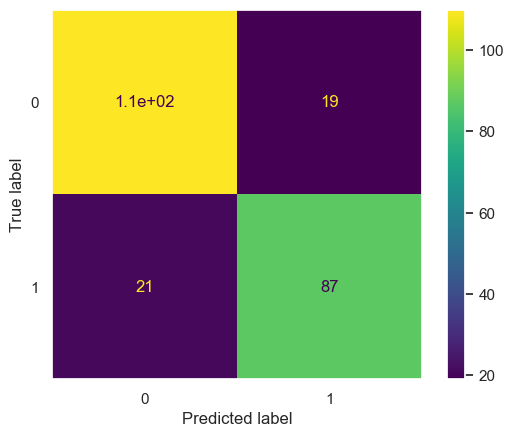

In [6]:
# confusion matrix
print(f"The accuracy score on training data is : "
      f"{round(accuracy_score(training_data_predictions, y_train),2)}")


precision_train = precision_score(y_train, training_data_predictions)
print(f"The precision on training data is : {round(precision_train, 2)}")


recall_train = recall_score(y_train, training_data_predictions)
print(f"The recall on training data is : {round(recall_train, 2)}")


sns.set_theme(style="dark")
cf_matrix_train = confusion_matrix(y_train, training_data_predictions)
cm_display_train = ConfusionMatrixDisplay(cf_matrix_train, display_labels=[0, 1]).plot()

The accuracy score on test data is : 0.75
The precision on test data is : 0.75
The recall on test data is : 0.72


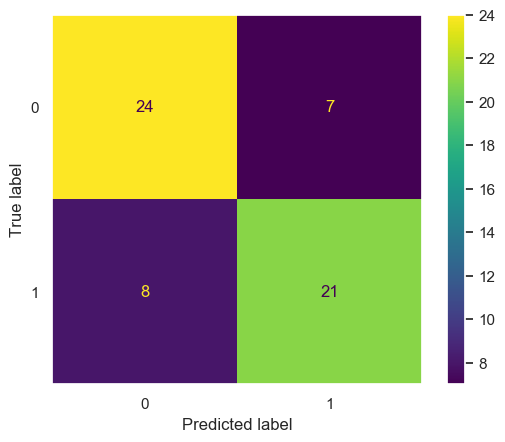

In [7]:
# confusion matrix
print(f"The accuracy score on test data is : "
      f"{round(accuracy_score(test_data_predictions, y_test),2)}")

precision_test = precision_score(y_test, test_data_predictions)
print(f"The precision on test data is : {round(precision_test, 2)}")

# recall
recall_test = recall_score(y_test, test_data_predictions)
print(f"The recall on test data is : {round(recall_test, 2)}")

cf_matrix_test = confusion_matrix(y_test, test_data_predictions)
cm_display_test = ConfusionMatrixDisplay(cf_matrix_test, display_labels=[0, 1]).plot()